In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv("My_Data.csv")


df["AI_Impact_num"] = (
    df["AI Impact"]
      .astype(str)
      .str.replace("%", "", regex=False)
      .astype(float)
)


df["AI_Workload_Ratio"] = df["AI_Workload_Ratio"].replace([np.inf, -np.inf], np.nan)
df["AI_Workload_Ratio"] = df["AI_Workload_Ratio"].fillna(df["AI_Workload_Ratio"].median())


X = df[["Tasks", "AI models", "AI_Workload_Ratio", "Job titiles", "Domain"]]
y = df["AI_Impact_num"]

num_cols = ["Tasks", "AI models", "AI_Workload_Ratio"]
cat_cols = ["Job titiles", "Domain"]


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=500, random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)


df["Model_AI_Impact"] = model.predict(X)


df["Model_AI_Impact"] = df["Model_AI_Impact"].clip(0, 100)


df["Job_Resilience_Score"] = 100 - df["Model_AI_Impact"]


out = df[[
    "Job titiles",
    "Domain",
    "AI Impact",
    "AI_Impact_num",
    "Model_AI_Impact",
    "Job_Resilience_Score"
]]

out.to_csv("job_model_resilience_index.csv", index=False)

print("job_model_resilience_index.csv oluşturuldu!")


job_model_resilience_index.csv oluşturuldu!


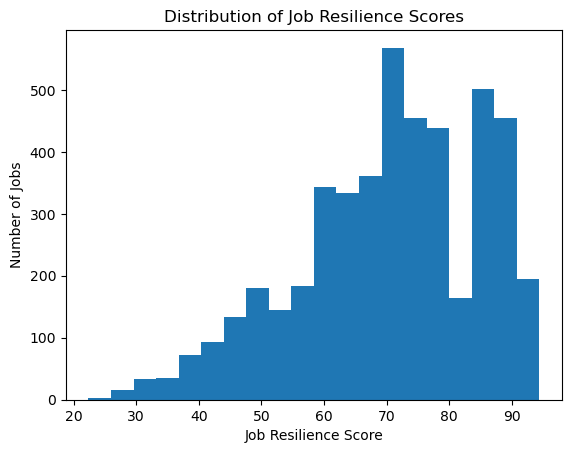

In [3]:
import matplotlib.pyplot as plt

plt.hist(df["Job_Resilience_Score"], bins=20)
plt.xlabel("Job Resilience Score")
plt.ylabel("Number of Jobs")
plt.title("Distribution of Job Resilience Scores")
plt.show()


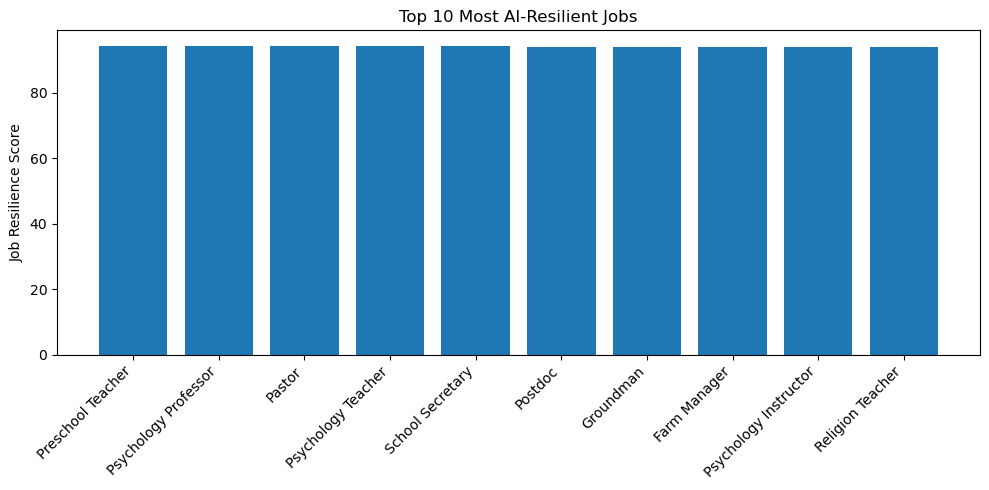

In [4]:
top10 = df.sort_values("Job_Resilience_Score", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top10["Job titiles"], top10["Job_Resilience_Score"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Job Resilience Score")
plt.title("Top 10 Most AI-Resilient Jobs")
plt.tight_layout()
plt.show()


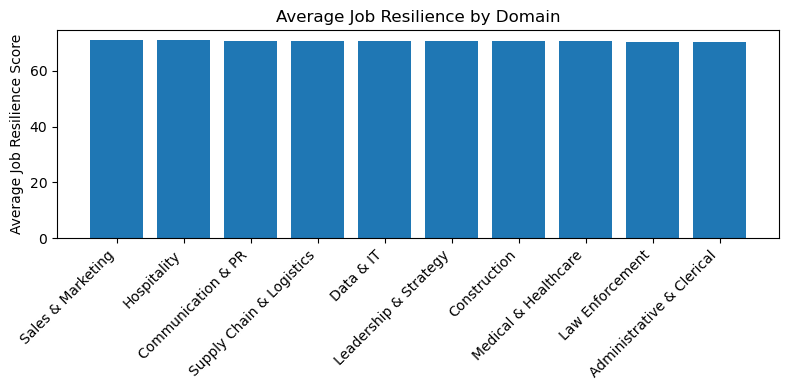

In [5]:
domain_res = df.groupby("Domain")["Job_Resilience_Score"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(domain_res.index, domain_res.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Job Resilience Score")
plt.title("Average Job Resilience by Domain")
plt.tight_layout()
plt.show()


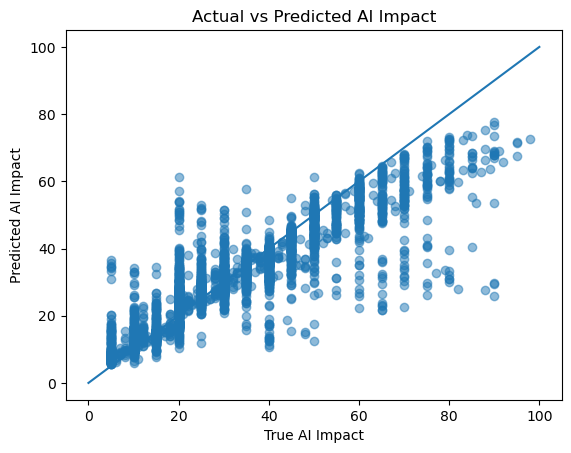

In [6]:
plt.scatter(df["AI_Impact_num"], df["Model_AI_Impact"], alpha=0.5)
plt.xlabel("True AI Impact")
plt.ylabel("Predicted AI Impact")
plt.title("Actual vs Predicted AI Impact")
plt.plot([0, 100], [0, 100])  # reference line
plt.show()
